<a href="https://colab.research.google.com/github/sudip234-source/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_curve, auc, roc_curve
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/creditcard.csv.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Exploratory Data Analysis

In [6]:
df.isna().sum().max()

0

In [7]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


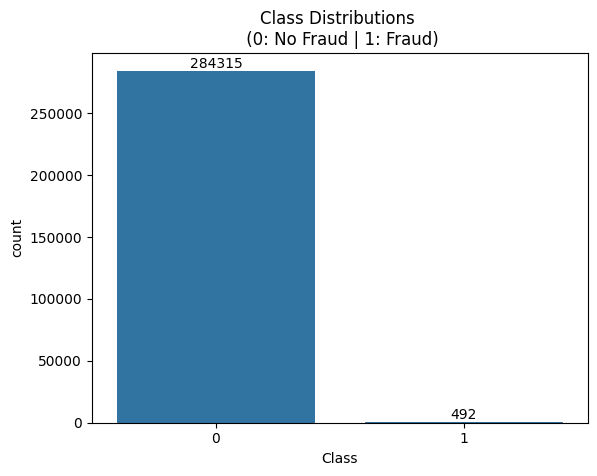

In [8]:
ax = sns.countplot(data=df, x="Class")
plt.title('Class Distributions \n (0: No Fraud | 1: Fraud)')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.1,
            f'{int(height)}',
            ha="center", va="bottom")

plt.show()

Distribution of Transaction **Amount**

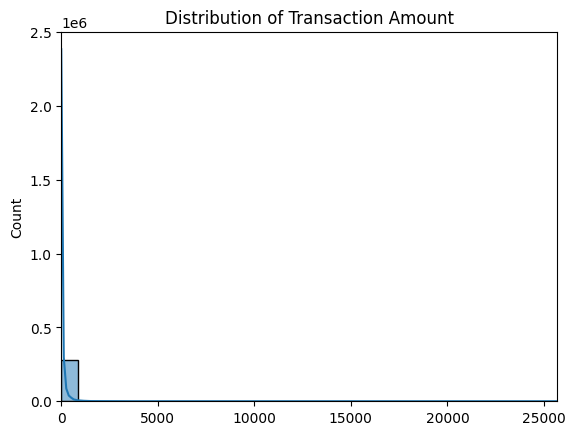

In [9]:
amount_val = df['Amount'].values

sns.histplot(data=df, x=amount_val, bins=30, kde=True)

plt.xlim(amount_val.min(), amount_val.max())

plt.title('Distribution of Transaction Amount')
plt.show()

Key Observations
1. Highly Skewed Distribution:

The transaction amounts are heavily concentrated near 0, indicating that most transactions involve small amounts.
A long tail extends to higher transaction values, with a few transactions reaching amounts close to 25,000.
2. Density Estimation (KDE):

The Kernel Density Estimation (KDE) curve confirms the skewness, with a sharp peak at low transaction amounts and minimal density in the higher range.
3. Outliers:

The presence of extremely high transaction amounts (outliers) is evident from the tail of the distribution. These outliers might represent fraudulent transactions or unusual legitimate transactions.

Implications for Fraud Detection¶
1. Feature Importance:

Transaction amount is likely an important feature for fraud detection, as fraudulent transactions often involve unusually high or low amounts compared to typical behavior.
2. Preprocessing Needs:

Normalization or Scaling: Since transaction amounts vary widely, normalization (e.g., MinMaxScaler or StandardScaler) is essential to prevent models from being biased toward larger values.
Outlier Handling: Outlier detection methods, such as Isolation Forests or robust statistical techniques, can help identify suspicious transactions.
3. Potential Bias:

The skewness might cause models to focus more on smaller transaction amounts, potentially overlooking patterns in larger transactions unless explicitly addressed during training.

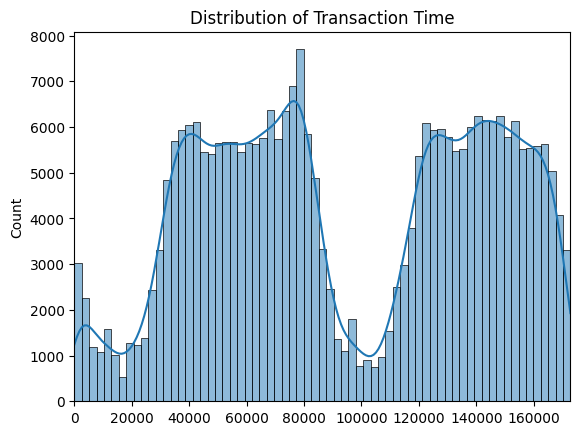

In [10]:
time_val = df['Time'].values

sns.histplot(data=df, x=time_val, kde=True)

plt.xlim(0, time_val.max())

plt.title('Distribution of Transaction Time')
plt.show()

Key Observations¶
1. Periodic Peaks:

The histogram shows clear periodic peaks in transaction frequency, suggesting that transactions occur more frequently at specific times during the day.
There are multiple high-density intervals, indicating recurring patterns in transaction activity.
2. Density Estimation (KDE):

The Kernel Density Estimation (KDE) curve overlays the histogram and confirms the periodic nature of transaction activity.
3. Time Range:

The x-axis spans from 0 to 172,800 seconds, which corresponds to a 48-hour period (assuming time is measured in seconds since the start of recording).
Low Activity Periods:

Between peaks, there are noticeable dips in transaction frequency, which could correspond to off-peak hours or times when fewer transactions occur.

Implications for Fraud Detection¶
1. Temporal Patterns:

Fraudulent transactions might deviate from typical temporal patterns. For example, unusual activity during low-frequency periods could be indicative of fraud.
2. Feature Engineering:

Create features based on transaction time, such as:
Time-of-day categories (e.g., morning, afternoon, evening).
Relative frequency compared to historical averages.
Peak/off-peak indicators.
3. Model Insights:

Temporal features can help models identify anomalies or unusual behavior that aligns with fraudulent activity.

## Data preprocessing and feature engineering

Sine and cosine transformations¶
Using sine and cosine transformations for the Time feature is essential when dealing with periodic data, such as transaction times. Here's why these transformations are necessary:

Capturing Periodicity
Transaction times are cyclical, repeating patterns over a fixed interval (e.g., 24 hours or 48 hours). The histogram of Time (shown in the fourth image) clearly illustrates periodic peaks and dips.
Sine and cosine transformations map the cyclical nature of Time into continuous features that represent its phase within the cycle.
Avoiding Discontinuity
Without transformations, the raw Time feature introduces discontinuity at cycle boundaries (e.g., transitioning from 172,799 seconds to 0 seconds). This can confuse machine learning models.
Sine and cosine features ensure smooth transitions by encoding Time as points on a unit circle, where sin(t) and cos(t) represent angular positions.
Enhancing Model Interpretability
Sine and cosine features provide interpretable representations:
sin(t): Represents the vertical component of the cycle.
cos(t): Represents the horizontal component of the cycle.
Together, these features allow models to learn temporal patterns effectively without being biased by raw numerical values.
Improving Model Performance
Machine learning models often struggle to learn relationships in raw cyclical data. By transforming Time into sine and cosine features, models can better capture periodic trends, such as peak transaction times or off-peak anomalies.

In [11]:
# Feature engineering: Convert transaction time into cyclical features
max_time = df['Time'].max()
df['sin_time'] = np.sin(2 * np.pi * df['Time'] / max_time)
df['cos_time'] = np.cos(2 * np.pi * df['Time'] / max_time)

df.drop(['Time'], axis=1, inplace=True)

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Class,sin_time,cos_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000,1.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000,1.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000036,1.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000036,1.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000073,1.0


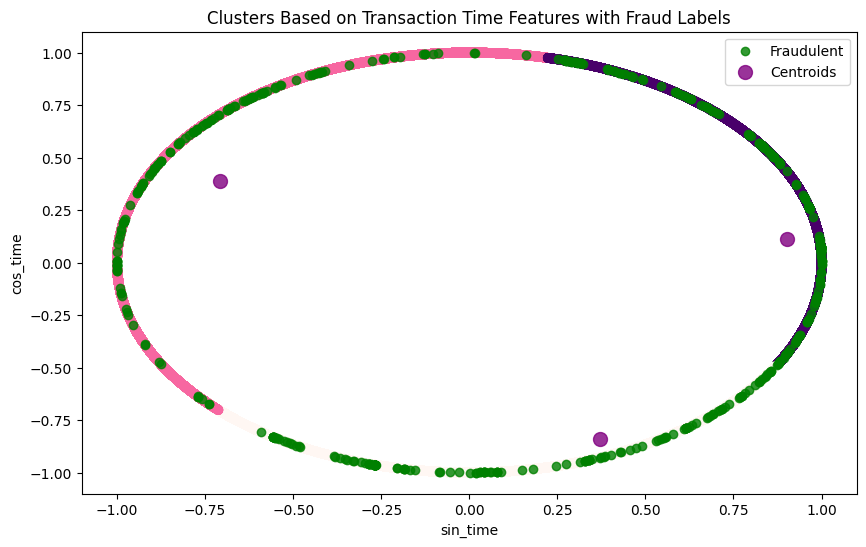

In [12]:
from sklearn.cluster import KMeans

# Perform clustering on cyclical features
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['sin_time', 'cos_time']])
#X['Class'] = y.values

# Visualize clusters with fraud labels
plt.figure(figsize=(10, 6))

# Plot legitimate transactions (Class = 0)
plt.scatter(df.loc[df['Class'] == 0, 'sin_time'],
            df.loc[df['Class'] == 0, 'cos_time'],
            c=df.loc[df['Class'] == 0, 'Cluster'],
            cmap='RdPu', alpha=0.6)

# Plot fraudulent transactions (Class = 1)
plt.scatter(df.loc[df['Class'] == 1, 'sin_time'],
            df.loc[df['Class'] == 1, 'cos_time'],
            c='green', alpha=0.8, label='Fraudulent')

# Add centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='purple', s=100, alpha=0.8, label='Centroids')

# Add labels and legend
plt.title('Clusters Based on Transaction Time Features with Fraud Labels')
plt.xlabel('sin_time')
plt.ylabel('cos_time')
plt.legend()
plt.show()

Key Observations:
1. Cluster Formation:

The transactions are grouped into three distinct clusters, as indicated by the clustering algorithm.
Each cluster is represented by a unique color gradient.
2. Fraudulent Transactions:

Fraudulent transactions (marked in green) are scattered across all clusters but appear more concentrated in certain regions.
This suggests that while fraud occurs across different time patterns, some clusters might represent temporal behaviors more prone to fraudulent activity.
3. Centroids:

The purple dots represent the centroids of the three clusters.
These centroids summarize the average characteristics of each cluster, providing insight into the central tendencies of transaction timing.
4. Temporal Patterns:

The use of sin_time and cos_time ensures that the cyclical nature of time is captured (e.g., daily or weekly cycles), resulting in an elliptical distribution of data points.
The clusters reflect distinct temporal behaviors, which may correspond to specific user activities or transaction types.
5. Overlap Between Clusters:

There is noticeable overlap between clusters, particularly along the edges of the ellipse. This overlap indicates that some transactions share similar timing characteristics, making it harder to differentiate them solely based on time features.

In [13]:
X = df.drop(['Class', 'Cluster'], axis=1)
y = df['Class']

In [14]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

scaled_amount = scaler.fit_transform(X['Amount'].values.reshape(-1,1))
#scaled_time = scaler.fit_transform(X['Time'].values.reshape(-1,1))

X.insert(0, 'scaled_amount', scaled_amount)
#X.insert(1, 'scaled_time', scaled_time)

X.drop(['Amount'], axis=1, inplace=True)

X.head()

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,sin_time,cos_time
0,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.000000,1.0
1,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000000,1.0
2,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.000036,1.0
3,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.000036,1.0
4,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.000073,1.0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Oversampling - ADASYN
ADASYN, short for Adaptive Synthetic Sampling, is an oversampling technique designed to address class imbalance in datasets. It generates synthetic samples for the minority class, focusing on harder-to-learn examples near decision boundaries. This method adapts the number of synthetic samples generated for each instance based on the density of the majority class around it.

Key Steps in ADASYN

Calculate Class Imbalance:

Determine the level of imbalance between the majority and minority classes.
Compute the total number of synthetic samples needed to balance the dataset.
Identify Hard-to-Learn Instances:

For each minority class instance, calculate its k-nearest neighbors (typically k=5)
Measure the proportion of neighbors belonging to the majority class. Instances surrounded by many majority class neighbors are considered harder to learn.
Adaptive Sampling:

Assign weights to minority class instances based on their difficulty (i.e., proximity to majority class instances).
Generate synthetic samples preferentially for harder-to-learn instances.
Generate Synthetic Samples:

For each minority instance, create synthetic samples by interpolating between it and its nearest neighbors.
The interpolation is performed randomly along the line connecting the instance and a neighbor.
Advantages of ADASYN

Focus on Hard-to-Learn Cases:

Unlike SMOTE, ADASYN prioritizes generating synthetic samples for instances near decision boundaries, improving classification performance for challenging cases.
Improved Generalization:

By emphasizing difficult examples, ADASYN helps models better generalize to unseen data.
Flexibility:

The adaptive nature of ADASYN allows it to dynamically adjust sampling based on local data distributions.

In [16]:
print("Class distribution before ADASYN:")
print(pd.Series(y).value_counts())

adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X, y)

print("Class distribution after ADASYN:")
print(pd.Series(y_train_adasyn).value_counts())

Class distribution before ADASYN:
Class
0    284315
1       492
Name: count, dtype: int64
Class distribution after ADASYN:
Class
0    284315
1    284307
Name: count, dtype: int64



Classification accuracy: 0.8864681717636319
AUC-ROC: 0.9431362549240292

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94     56864
           1       0.01      1.00      0.03        98

    accuracy                           0.89     56962
   macro avg       0.51      0.94      0.48     56962
weighted avg       1.00      0.89      0.94     56962



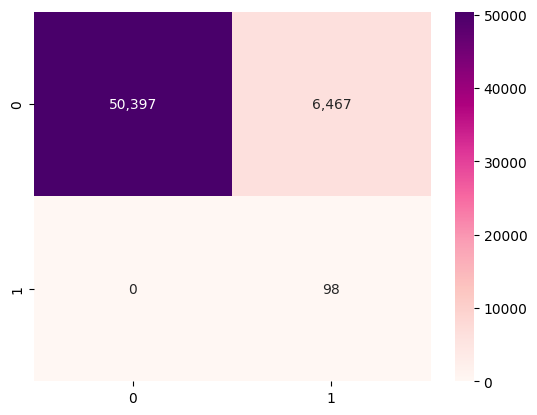

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=9, weights='distance')
lda = LDA(priors=None, shrinkage='auto', solver='lsqr')
log_reg = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000, random_state=42, C=0.001, class_weight={0:1, 1:5})

# Create VotingClassifier ensemble model
ensemble = VotingClassifier(
    estimators=[('knn', knn), ('lda', lda), ('lr', log_reg)],
    voting='soft'
)

# Train ensemble model
ensemble.fit(X_train_adasyn, y_train_adasyn)

# Predict probabilities and apply threshold
threshold = 0.4
y_pred_proba = ensemble.predict_proba(X_test)[:, 1]
y_pred_final = (y_pred_proba >= threshold).astype(int)

print("\nClassification accuracy:", accuracy_score(y_test, y_pred_final))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_final))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_final))

conf_matrix = confusion_matrix(y_test, y_pred_final)
sns.heatmap(conf_matrix, annot=True, fmt=',d', cmap='RdPu')
plt.show()

# Confusion Matrix Analysis
The confusion matrix provides insights into model predictions:

True Positives (TP): 98 fraudulent transactions correctly identified.
True Negatives (TN): 50,397 legitimate transactions correctly classified.
False Positives (FP): 6,467 legitimate transactions incorrectly flagged as fraud.
False Negatives (FN): 0 fraudulent transactions missed by the model.
Key Observations:

The model achieves perfect recall for fraud detection but suffers from extremely low precision, leading to a high number of false positives.
False positives (FP) are problematic as they inconvenience legitimate users and strain resources.

## Threshold Impact
The classification threshold significantly impacts precision and recall:

A lower threshold prioritizes recall, ensuring all fraud cases are detected but increases false positives, reducing precision.
A higher threshold improves precision by reducing false positives but risks missing actual fraud cases, lowering recall. Balancing these metrics requires careful threshold tuning based on business objectives and tolerance for false alarms.